# How Does a Neural Net Really Work?

In [2]:
from ipywidgets import interact
from fastai.basics import *

plt.rc('figure', dpi=90)

def plot_function(f, title=None, min=-2.1, max=2.1, color= 'r', ylim=None):
    x = torch.linspace(min, max, 100)[:, None]
    if ylim: plt.ylim(ylim)
    plt.plot(x, f(x), color=color)
    if title is not None: plt.title(title)

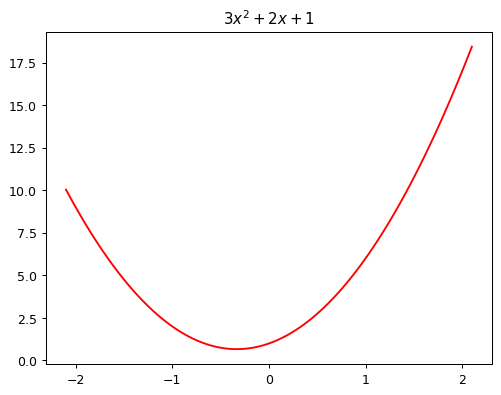

In [3]:
def f(x): return 3*x**2 + 2*x + 1
plot_function(f, '$3x^2 + 2x + 1$')

In [4]:
def quad(a, b, c, x): return a*x**2 + b*x + c

In [5]:
def mk_quad(a,b,c): return partial(quad, a, b, c)

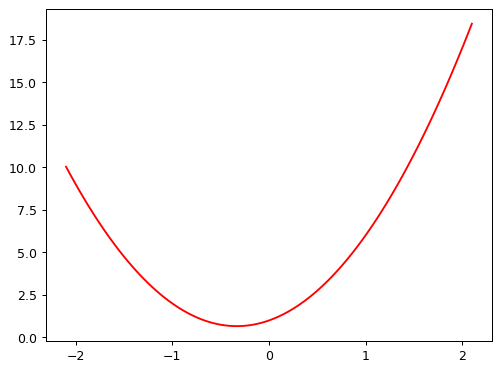

In [6]:
f2 = mk_quad(3,2,1)
plot_function(f2)

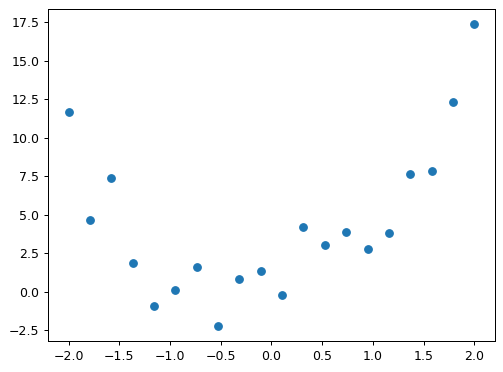

In [7]:
def noise(x, scale): return np.random.normal(scale=scale, size=x.shape)
def add_noise(x, mult, add): return x * (1+noise(x, mult)) + noise(x, add)

np.random.seed(69)

x = torch.linspace(-2, 2, steps=20)[:, None]
y = add_noise(f(x), 0.15, 1.5)

plt.scatter(x, y)

In [8]:
@interact(a=1.1, b=1.1, c=1.1)
def plot_quad(a, b, c):
    plt.scatter(x, y)
    plot_function(mk_quad(a,b,c), ylim=(-3, 13))

interactive(children=(FloatSlider(value=1.1, description='a', max=3.3000000000000003, min=-1.1), FloatSlider(v…

In [10]:
def mse(preds, acts): return ((preds-acts)**2).mean()

@interact(a=1.1, b=1.1, c=1.1)
def plot_quad(a,b,c):
    f = mk_quad(a,b,c)
    plt.scatter(x, y)
    loss = mse(f(x), y)
    plot_function(f, ylim=(-3,13), title=f'Loss: {loss:.2f}')

interactive(children=(FloatSlider(value=1.1, description='a', max=3.3000000000000003, min=-1.1), FloatSlider(v…

In [12]:
def quad_mse(params):
    f = mk_quad(*params)
    return mse(f(x), y)

quad_mse([1.1, 1.1, 1.1])

tensor(13.4869, dtype=torch.float64)

In [13]:
abc = torch.tensor([1.1, 1.1, 1.1]).requires_grad_()
abc

tensor([1.1000, 1.1000, 1.1000], requires_grad=True)

In [14]:
loss = quad_mse(abc)
loss.backward()
abc.grad

tensor([-11.8041,  -1.4745,  -3.4317])

In [15]:
with torch.no_grad():
    abc -= abc.grad*0.01
    loss = quad_mse(abc)

print(f'loss={loss:.2f}')

loss=12.02


In [17]:
for i in range(5):
    loss = quad_mse(abc)
    loss.backward()
    with torch.no_grad(): abc -= abc.grad*0.01
    print(f'step={i}, loss={loss:.2f}')

step=0, loss=11.58
step=1, loss=9.49
step=2, loss=6.95
step=3, loss=4.86
step=4, loss=3.94


In [18]:
abc

tensor([2.6362, 2.0792, 0.0108], requires_grad=True)